## INTRODUCTION TO SCKIT-LERN (SKLEARN)
What we are going to cover

0. An en-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make prediction on our data
4.  Evaluating a model
5.  Improve a model
6.  Save and load a trained model
7.  Putting it all together

In [2]:
import numpy as np

## 0. An end-toend ScikitLearn workflow

## 1. get the data ready

In [3]:

import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix), Y (labels)
X = heart_disease.drop("target", axis=1) #target column hariç tüm hepsini istiyoruz 
y = heart_disease["target"]

## 2. choose right model and hyperparameters 

In [5]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We will keep the defauşt hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the training data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
# bu verilerin %80inin eğitim için kullanılacağı anlamına gelir 

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# make a prediction 
y_label = clf.predict(np.array([0, 2, 3, 4]))

C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
y_test

238    0
93     1
207    0
261    0
133    1
      ..
219    0
101    1
42     1
48     1
19     1
Name: target, Length: 61, dtype: int64

## 4. evaluate the model 

In [17]:
# sınıflandırıcımızın eğitim verileri üzerinde öğrenmeyi ne kadar
# iyi yaptığını değerlendirdiğimiz yer 
clf.score(X_train, y_train)
# mean accuracy on the given test data and labels 

1.0

In [18]:
clf.score(X_test, y_test)

0.7213114754098361

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.74      0.72      0.73        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [20]:
# test etiketlerini tahminlerle karşılaştıran bazı sınıflandırma metrikleri gösterir

In [21]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 9, 23]], dtype=int64)

In [22]:
accuracy_score(y_test, y_preds)

0.7213114754098361

## 5. improve a model 


In [23]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10, 100, 10):
    print(f"Trying model with {i} estimator...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print(" ")

Trying model with 10 estimator...
Model accuracy on test set: 70.49%
 
Trying model with 20 estimator...
Model accuracy on test set: 73.77%
 
Trying model with 30 estimator...
Model accuracy on test set: 72.13%
 
Trying model with 40 estimator...
Model accuracy on test set: 73.77%
 
Trying model with 50 estimator...
Model accuracy on test set: 70.49%
 
Trying model with 60 estimator...
Model accuracy on test set: 72.13%
 
Trying model with 70 estimator...
Model accuracy on test set: 70.49%
 
Trying model with 80 estimator...
Model accuracy on test set: 70.49%
 
Trying model with 90 estimator...
Model accuracy on test set: 73.77%
 


## 6. Save a model and load it    

In [24]:
import pickle 
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [25]:
loaded_model= pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7377049180327869

## 1.Getting our data ready to be used with machine learning
Three main things we have to do:
1. Split the data into features and labels (usually 'X' & 'y')
2. Filling (also called imputing) or disregaring missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X= heart_disease.drop("target", axis=1) 
# 0 : satır , 1: sütun
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
# test veri setimizin toplam verinin %20si olmasını istediğimize karar verdik

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
X.shape

(303, 13)

In [32]:
len(heart_disease)

303

## 1.1. Make Sure it is all numerical"

In [33]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (km),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
len(car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (km)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
# Split into X/y
X= car_sales.drop("Price", axis=1)
y= car_sales["Price"]

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [37]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [38]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [39]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [40]:
dummies= pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [41]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [42]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2. what if there were missing values?
1. Fill them some value (also known as imputation)
2. Remove the samples with missing data altogether 

In [43]:
# import car sales missing data 
file_path = "car-sales-extended-missing-data-3.csv"  # Ensure correct path
car_sales_missing = pd.read_csv(file_path, delimiter=";", skiprows=0)  # Adjust if needed
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,354310.0,40.0,153230.0
1,BMW,Blue,1927140.0,50.0,199430.0
2,Honda,White,847140.0,40.0,283430.0
3,Toyota,White,1543650.0,40.0,134340.0
4,Nissan,Blue,1815770.0,30.0,140430.0
...,...,...,...,...,...
995,Toyota,Black,358200.0,40.0,320420.0
996,NaN,White,1551440.0,30.0,57160.0
997,Nissan,Blue,666040.0,40.0,315700.0
998,Honda,White,2158830.0,40.0,40010.0


In [44]:
car_sales_missing.isna().sum() # burada hangi başlıkta kaç tane eksik datamız olduğunu gösterir

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Create X & y 
X= car_sales_missing.drop("Price", axis=1) # fiyat sütununu kullanmka için diğer başlıklar
y= car_sales_missing["Price"]

In [46]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X
# bunu çalıştırdığında değerler arasında NaN var hatası alacaksın
# bunu düzeltmen gerekiyor 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

## Option 1 : Fill missing data with pandas 

In [47]:
# Fill the Make column 
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column 
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer column 
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the Doors column 
car_sales_missing["Doors"].fillna(40)
#çünkü ort olarak en çok 4 kapı var


C:\Users\buse\AppData\Local\Temp\ipykernel_45968\407597794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\buse\AppData\Local\Temp\ipykernel_45968\407597794.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

0      40.0
1      50.0
2      40.0
3      40.0
4      30.0
       ... 
995    40.0
996    30.0
997    40.0
998    40.0
999    40.0
Name: Doors, Length: 1000, dtype: float64

In [48]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [49]:
# Create X&y 
X= car_sales_missing.drop("Price", axis=1) # fiyat sütununu kullanmka için diğer başlıklar
y= car_sales_missing["Price"]

In [50]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X= transformer.fit_transform(X)
transformed_X
# bunu çalıştırdığında değerler arasında NaN var hatası alacaksın
# bunu düzeltmen gerekiyor 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3424 stored elements and shape (856, 15)>

## Option 2: Fill missing values with Scikit-Learn

In [51]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data-3.csv", delimiter=";", skiprows=0)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,354310.0,40.0,153230.0
1,BMW,Blue,1927140.0,50.0,199430.0
2,Honda,White,847140.0,40.0,283430.0
3,Toyota,White,1543650.0,40.0,134340.0
4,Nissan,Blue,1815770.0,30.0,140430.0


## 2. Choosing the right estiimator/algorithm for your problem 
Some things to note: 
- Sklearn refers to machine lerarnin g models, algortihms as estimator.
- Classification problem - predicting a category (heart disease or not)
   - Sometimes youll see clf (short classifier) used as as a classification estmator
- regression problem - predicting number (selling price of car)

 ## 2.1. picking a machine learning model for regression problem
Let's use California Housing dataset 

In [52]:
# Get California Housing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [53]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [54]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [56]:
#  Import algorithm 
from sklearn.linear_model import Ridge 

#  Setup random seed 
np.random.seed(42)

# Create a data 
X= housing_df.drop("target", axis=1)
y= housing_df["target"] # median house price in 100,000

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# modeli örneklemek ve oturtmak istiyoruz (on the training set).
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)


0.5758549611440131

## coefficient of determination = iki değerr arasındaki ilişkinin ne kadar güçlü olduğunu değerlendirir 

What if Ridge didn't work or the score didn't fit our needs?
Well, we could always try a different model..

# Ensemble methods : genellenebilirliği artıttırmak için belirli bir öğrenme algoritması ile oluşturulan birkaç temel tahmincinin tahminlerini birleştirmektir 

In [57]:
# Import the RandomForestRegressor model class from trhe ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup the random the seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2. Picking machine learning model for Classification Problem 

In [58]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
len(heart_disease)

303

haritaya göre "Linar SVC" denememizi söylüyor

In [60]:
# Import the LinearSVC estimator class 
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC 
clf= LinearSVC()
clf.fit(X_train, y_train)

#evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [61]:
# Import the RandomForestClassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier 
clf= RandomForestClassifier()
clf.fit(X_train, y_train)

#evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

## 1. If you have yapılandırılmış/structured data, used ensemble methods
## 2. If you have unstructured data, use deep learning or transfer learning

### 3. Fit the model/algorithm on our data and use it to make predictions 

Different names for: 

X = features, features variables, data

y= labels, targets, target variables 

In [62]:
# Import the RandomForestClassifier estimator class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# make the data
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier 
clf= RandomForestClassifier()

# Fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

#evaluate the RandomForestClassifier (use the patterns the model has the lea<rn )
clf.score(X_test, y_test)

0.8524590163934426

## 3.2. Make predictin using the machine learning model 

2 ways to make predictions :
1. 'predict()'
2. 'predict_proba()'

In [63]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work... 

C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [64]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [65]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [67]:
# Compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

# Make predictions with predict_proba() 

In [70]:
# Tüm sınıflar için döndürülen tahminler sınıfların etiketine göre sıralanır 
clf.predict_proba(X_test[:5]) # örneklemimizin belirli bir etikete sahip olma olasılığını hesaplamak istiyoruz

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [71]:
# Let's predict() on same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [72]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models. 

In [73]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into training and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# create a model instance
model = RandomForestRegressor()

# Fit the model 
model.fit(X_train, y_train)

# make predictions 
y_preds = model.predict(X_test)

In [75]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [76]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [77]:
len(y_preds)

4128

In [78]:
len(y_test)

4128

In [79]:
# ABSOLUTE ERROR : tahmin edilen değerler ile gerçek değerler arasındaki ortalama fark

# compare the predictions to the thruth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model 

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions 

### 4.1. Evaluating a model with `score` method 

In [80]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X and y 
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

# create classifier model instance
clf= RandomForestClassifier()

# fit classifier to training data 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
clf.score(X_train, y_train)

1.0

In [82]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score()`on our regression problem... 

In [83]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X= housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into training and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# create a model instance
model = RandomForestRegressor(n_estimators =100)

# Fit the model 
model.fit(X_train, y_train)


RandomForestRegressor()

In [84]:
model.score(X_test, y_test)

0.8065734772187598

### 4.2. Evaluating a model using `scoring` parameter

In [85]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create X and y 
X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

# create classifier model instance
clf= RandomForestClassifier()

# fit classifier to training data 
clf.fit(X_train, y_train);


In [86]:
clf.score(X_test, y_test)

0.8524590163934426

In [87]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [88]:
cross_val_score(clf, X, y, cv= 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [89]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score= np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score 

(0.8524590163934426, 0.8248087431693989)

In [90]:
cross_val_score(clf, X, y, cv=5, scoring= None) 

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1. Classificaiton model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classifiation report 

### 1. Accuracy

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier()
cross_val_score =cross_val_score(clf, X, y, cv=5)

In [92]:
np.mean(cross_val_score) # bize modelimizin ortalama doğruluğunu verecek

0.8248087431693989

In [93]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score) * 100:.2f}%")
# Rastgele bir örnek verildiğinde bir modelin daha önce 

Heart Disease Classifier Cross-Validation Accuracy: 82.48%


### 2. Area under ROC curve 
** Area under curve (AUC)
** ROC curve

ROC curves are comparision of a model's true positive rate (tpr) vs a models false positive rate (fpr)

* True positive = model predicts 1 when thruth is 1
* False positive = model predicts 1 when thruth is 0
* True negative = model predict 0 when thruth is 0
* False negative = model predict 0 when thruth is 1

In [94]:
# Create X_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [96]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [97]:
# Calculate fpr, tpr and tresholds 
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

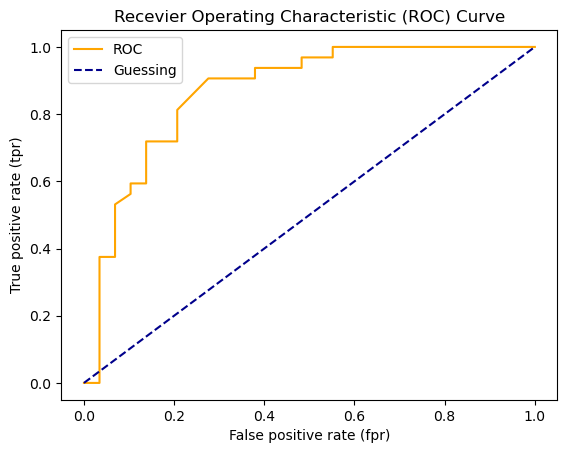

In [98]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve 
plt.plot(fpr, tpr, color="orange", label="ROC")
#plot line with no predictive power (baseline)
plt.plot([0, 1], [0, 1], color="darkblue", linestyle= "--", label="Guessing")

# Customize the plot
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("Recevier Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

plot_roc_curve(fpr, tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

In [100]:
# Plot pefect ROC curve and AUC score
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [101]:
# Perfect  AUC score 
roc_auc_score(y_test, y_test)

1.0

### 3. Confusion Matrix 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [102]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [103]:
# Visualize confusion matrix with pd.cosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


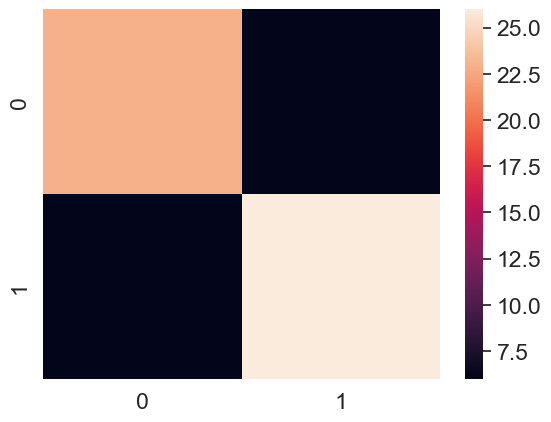

In [104]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion martrix 
conf_mat= confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

In [105]:
## !conda install 

** Confusion Matrix** 
The next way to evaluate a classification model is by using a confusion matrix 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suppose the predict

In essence, this gives you an idea of where the model is getting confused 

In [106]:
from sklearn.metrics import confusion_matrix 
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [108]:
import sklearn
sklearn.__version__

'1.5.1'

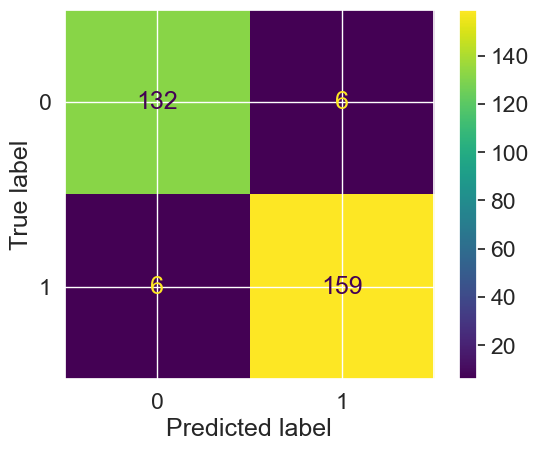

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

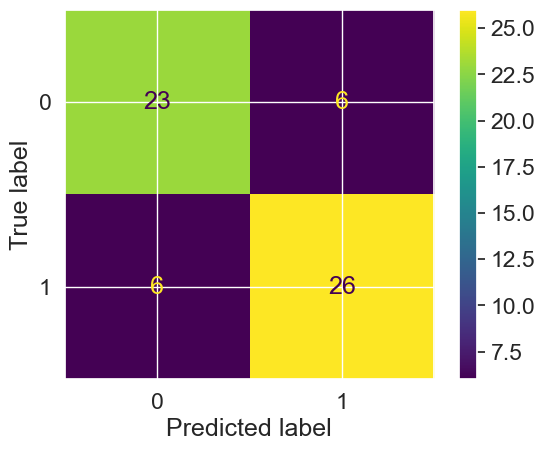

In [110]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

### Classification Report 

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [112]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # sadece 1 tane vaka var 

disease_preds= np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2. Regression model evaluation metric 
The ones we're going to cover are:
1. R^2 or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean squared error (MSE)

   R^2 : compares your model predictions to the mean of the targets.

In [114]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y= housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
model.score(X_test, y_test)

0.8065734772187598

In [116]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [117]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [118]:
y_test.mean()

2.0550030959302323

In [120]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]


array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

** Mean absolute error (MAE) ** 

MAE is the average of the absolute differences between predictions and actual values. 

It gives you an idea of how wrong ypur models predictions are.


In [123]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
# daha önce oluşturduğumuz modelimizi test veri seti Y üzerinde tahmin yapmak için kullan.
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [125]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [128]:
df["differences"].mean() # bunun mae farklı olmasının sebebi negatif olarak alması bize abs laz

0.012048392126937589

In [130]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

** Mean squared error **
MSE is the mean of the square of the errors between actual and predicted values. 

In [131]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [132]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [141]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 # manuel olarak değer değiiştirdik

C:\Users\buse\AppData\Local\Temp\ipykernel_45968\930705801.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16 # manuel olarak değer değiiştirdik


In [142]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [143]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [144]:
df_large_error.iloc[1:100]= 20 
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [145]:
df_large_error["squared_differences"].mean()

0.7334180712088106

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

### 4.2.3. `Scoring` parameter

Modeli değerlendiriyoruz. Tahminleri, tahmin etmesi gerekenlerle karşılaştırırsın. 

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [147]:
np.random.seed(42)

# cross-validation accuray : veri setimizi birden fazla eğitim ve test setine bölerek değerlendirmek
cv_acc =  cross_val_score(clf, X, y, cv=5, scoring=None) # beş farklı eğitim ve test bölümüne ayıracak ve beş farklı eğitim setinde model eğitecek
# eğer scoring=None, tahmin ediciler sınıflandırma modelleri için doğruluk olan varsayılan puanlama değerlendirme metriği kullanır.

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [148]:
print(f"The cross-valiated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-valiated accuracy is: 82.48%


In [149]:
# bu sayıların her çalıştırdığımzda aynı olması için random seed oluşturuyoruz
np.random.seed(42) 
cv_acc =  cross_val_score(clf, X, y, cv=5, scoring="accuracy") 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
print(f"The cross-valiated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-valiated accuracy is: 82.48%


In [151]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [153]:
print(f"The cross-valiated precision is: {np.mean(cv_acc)}")

The cross-valiated precision is: 0.8248087431693989


In [155]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [156]:
print(f"the cross-validated recall is: {np.mean(cv_recall)}")

the cross-validated recall is: 0.8545454545454545


precission = TP/TP+FP    recall= TP/TP+FN

Let's see the `scoring` parameter being used for reggression problem...

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [160]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [159]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [162]:
# MEAN SQUARED ERROR
# higher return values are better than lower return values
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4612318847966544

In [164]:
cv_mse

array([-0.51325643, -0.32925916, -0.54118007])

In [163]:
# MEAN ABSOLUTE ERROR
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)


-0.48439810187984494

In [165]:
cv_mae

array([-0.52205211, -0.42567334, -0.50546886])

### 4.3 Using different evaluatiın metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is using the `sklearn.metrics` module

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model 
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions 
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, clf.predict(X_test))*100:.2f}%")
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"F1:{f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384616


In [175]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions 
print("Regression metrics on the test set")
print(f"R2 score:{r2_score(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R2 score:0.8065734772187598
MAE:0.32659871732073664
MSE:0.2534678520824551


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model 

From a data perspective:
* Could we collect data? (generally, the more data, the better)
* Coould we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Parametreler ve hiperparametreler arasındaki fark ise bir makine öğrenimi modelinin verilerdeki
örüntüleri kendi başına bulma çalışmasıdır.

parametreleri kendi bulmaya çalışacak
hiperparametreler model üzerinde ayarlayabileceğimiz ayarlardır

Hiperparemetreleri ayarlamanın 3 yolu vardır: 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV
   

In [179]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [180]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1. Tuning hyperparameter by hand 
Let's make 3 sets; training, validation, test

We're going to try and adjust:
1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [182]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : round(accuracy, 2),
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict 

In [183]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, valid, test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # %70 of dat
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # %15 of data
X_train, y_train = X[:train_split] , y[:train_split]
X_valid , y_valid = X[train_split:valid_split] , y[train_split:valid_split]
X_test , y_test = X[valid_split:] , y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics 


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [186]:
np.random.seed(42)

# Create a second classifier with different hyperparameter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2. Hyperparameter tuning with RandomizedSearchCV"

In [193]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 2000],
       "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test setsz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # işlerde bilgisayar işleminizin ne kadarını bu makine öğrenimi modelini ayıracaksın? -1 hepsi demektir

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, # number of models to try 
                         cv=5,
                         verbose=2)

# Fit the RandomizedSearchCV version of clf 
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

In [194]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [195]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds) 

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


### 5.3 Hyperparameter tuning with GridSearchCV

In [196]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [198]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2, 4, 6],
          'min_samples_leaf': [1, 2, 4]}
# hiper parametre arama alanımızı daralttık 

In [199]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test setsz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # işlerde bilgisayar işleminizin ne kadarını bu makine öğrenimi modelini ayıracaksın? -1 hepsi demektir

# Setup GridSearchCV 
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                         cv=5,
                         verbose=2)

# Fit the RandomizedSearchCV version of clf 
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\buse\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

In [200]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [201]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


Let's compare our different models metrics

<Axes: >

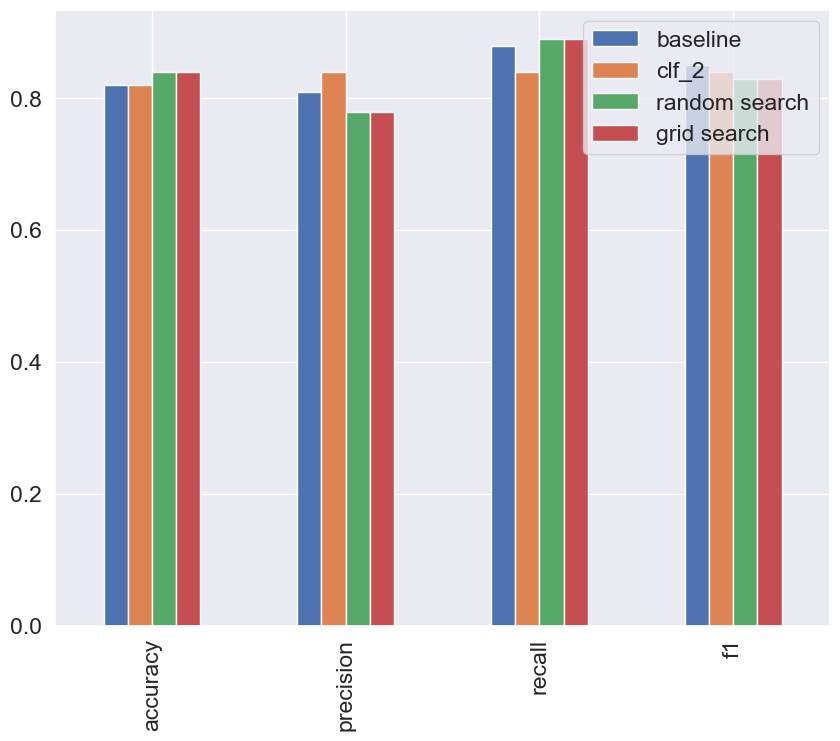

In [202]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8))

## Saving and Loading machine learning models

Two ways to save and load machine learning models:
1. With Phyton's `pickle` module
2. With the `joblib` module

   **Pickle**

In [205]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [206]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

### Make some prediction 
pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test, pickle_y_preds) 

In [207]:
from joblib import dump, load 

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")


['gs_random_forest_model_1.joblib']

In [209]:
# Import a saved joblib model 
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [210]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

## 7. Putting it all together 

In [214]:
file_path = "car-sales-extended-missing-data-3.csv"  # Ensure correct path
data = pd.read_csv(file_path, delimiter=";", skiprows=0)  # Adjust if needed
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,354310.0,40.0,153230.0
1,BMW,Blue,1927140.0,50.0,199430.0
2,Honda,White,847140.0,40.0,283430.0
3,Toyota,White,1543650.0,40.0,134340.0
4,Nissan,Blue,1815770.0,30.0,140430.0
...,...,...,...,...,...
995,Toyota,Black,358200.0,40.0,320420.0
996,NaN,White,1551440.0,30.0,57160.0
997,Nissan,Blue,666040.0,40.0,315700.0
998,Honda,White,2158830.0,40.0,40010.0


In [216]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [217]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do all (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [5]:
# Getting data ready 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modedling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV 

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
file_path = "car-sales-extended-missing-data-3.csv"  
data = pd.read_csv(file_path, delimiter=";", skiprows=0) 
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
                                   ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                   ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
    
])
numeric_features  = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y= data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.20607732059496342

It's also to use `GridSearchCV` and `RandomizedSearchCV` with our `Pipeline`

In [10]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [11]:
gs_model.score(X_test, y_test)

0.2924551102708053